In [2]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Users/kevinlevy/Documents/codes/master_thesis/code/apjfonts}')
from matplotlib.lines import Line2D
from cosmo import CosmoCalc
import sims
import tools
import lensing
import foregrounds as fg
import experiments as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:93: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if freq is 'effective': continue


## Generating CMB Temperature Anisotropy Maps

In [2]:
nber_maps = 1
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cmb_map = sims.cmb_mock_data(map_params, l, cl)

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:97: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))


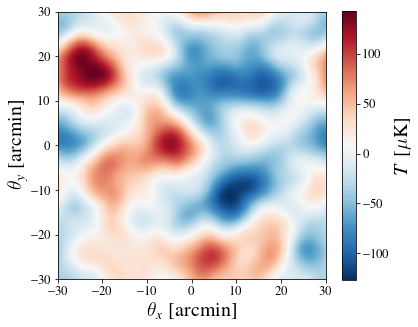

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
_, extent = tools.make_grid(map_params)
sz = 20

im = ax.imshow(cmb_map, extent = extent, cmap = cm.RdBu_r)
cb = fig.colorbar(im, shrink = 0.825)
cb.set_label(label=r'$T \ [\mu$'+'K]', size=sz)
cb.ax.tick_params(labelsize=sz-7)
ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
ax.tick_params(labelsize = sz-7)

fig.savefig('cmb_temperature_anisotropy_map.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

In [4]:
map_params = [240, 0.25, 240, 0.25]
kappa_map = lensing.NFW(6e14, 3, 1, 1100).kappa_map(map_params)
alpha_vec = lensing.alpha_from_kappa(map_params, kappa_map)
alphaX, alphaY = alpha_vec
alpha_map = np.hypot(alphaX, alphaY)

/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


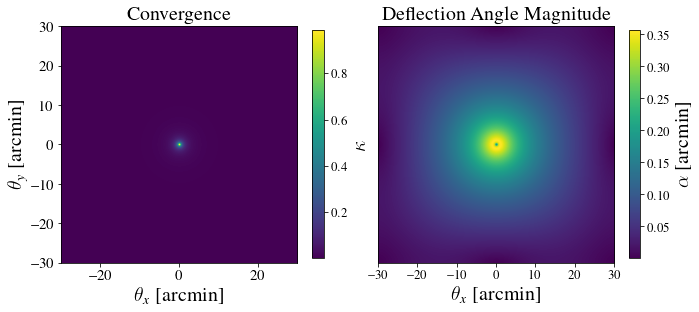

In [5]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(9.5,9.5))
sz = 20

im0 = axarr[0].imshow(kappa_map, extent = extent)
cb0 = fig.colorbar(im0, ax = axarr[0], shrink = 0.333)
cb0.set_label(label = r'$\kappa$', size=sz)
cb0.ax.tick_params(labelsize=sz-7)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_title('Convergence', fontsize = sz)
axarr[0].tick_params(labelsize = sz-5)

im1 = axarr[1].imshow(alpha_map, extent = extent)
cb1 = fig.colorbar(im1, ax = axarr[1], shrink = 0.333)
cb1.set_label(label = r'$\alpha \ $' + '[arcmin]', size=sz)
cb1.ax.tick_params(labelsize=sz-7)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_title('Deflection Angle Magnitude', fontsize = sz)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz-7)

fig.tight_layout(pad=0)
fig.savefig('convergence_deflection_map.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

## kSZ and tSZ Cutout

In [6]:
map_params = [40, 0.25, 40, 0.25]
fname = 'sim_data/mdpl2_cutouts_for_tszksz_clus_detection_M1.7e+14to2.3e+14_z0.6to0.8_15320haloes_boxsize20.0am.npz'
cutouts_dic = np.load(fname, allow_pickle = 1, encoding= 'latin1')['arr_0'].item()
mass_z_key = list(cutouts_dic.keys())[0]
cutouts = cutouts_dic[mass_z_key]
scale_fac = fg.compton_y_to_delta_Tcmb(145, uK = True)
tsz_cutouts, ksz_cutouts = [], []
for kcntr, keyname in enumerate( cutouts ):
    tsz_cutouts.append(cutouts[keyname]['y']*scale_fac)
    ksz_cutouts.append(cutouts[keyname]['ksz']*random.randrange(-1, 2, 2))
rand_state = random.randint(0, len(tsz_cutouts)-1)
tsz_cutout = tsz_cutouts[rand_state]
ksz_cutout = ksz_cutouts[rand_state]

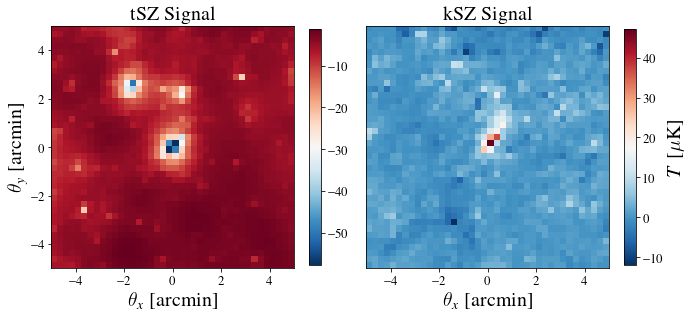

In [7]:
_, extent = tools.make_grid(map_params)
fig, axarr = plt.subplots(1,2, figsize=(9.5,9.5))
sz = 20

im0 = axarr[0].imshow(tsz_cutout, extent = extent, cmap = cm.RdBu_r)
cb0 = fig.colorbar(im0, ax = axarr[0], shrink = 0.345)
cb0.ax.tick_params(labelsize=sz-7)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[0].set_title('tSZ Signal', fontsize = sz)
axarr[0].tick_params(labelsize = sz-7)

im1 = axarr[1].imshow(ksz_cutout, extent = extent, cmap = cm.RdBu_r)
cb1 = fig.colorbar(im1, ax = axarr[1], shrink = 0.345)
cb1.set_label(label=r'$T \ [\mu$'+'K]', size=sz)
cb1.ax.tick_params(labelsize=sz-7)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
axarr[1].set_title('kSZ Signal', fontsize = sz)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz-7)

fig.tight_layout(pad=0)
fig.savefig('tSZ_kSZ_cutout.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)

## Extragalactic Power Spectra

In [8]:
l, cl = CosmoCalc().cmb_power_spectrum()
l, cl_radio = fg.extragalactic_power_spectrum(150, components = ['radio'])
l, cl_cib = fg.extragalactic_power_spectrum(150, components = ['cib'])
l, cl_tsz = fg.extragalactic_power_spectrum(150, components = ['tsz'])
l, cl_ksz = fg.extragalactic_power_spectrum(150, components = ['ksz'])
l, cl_tsz_cib = fg.extragalactic_power_spectrum(150, components = ['tsz_cib'])
l, cl_fg_total = fg.extragalactic_power_spectrum(150, components = 'all')

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:97: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: divide by zero encountered in true_divide
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:82: RuntimeWarning: invalid value encountered in multiply
  cl_rg = (2*np.pi)/(l * (l+1))*dl_rg
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: divide by zero encountered in true_divide
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:112: RuntimeWarning: invalid value encountered in multiply
  cl_cib =  (2*np.pi)/(l * (l+1)) * dl_cib
/Volumes/Extreme_SSD/codes/master_thesis/code/foregrounds.py:128: RuntimeWarning: divide by zero encountered in true_divide
  cl_tsz =  (2*np.pi)/(l * (l+1)) * dl_tsz
/Volumes/Extreme_SSD/codes/master_t

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


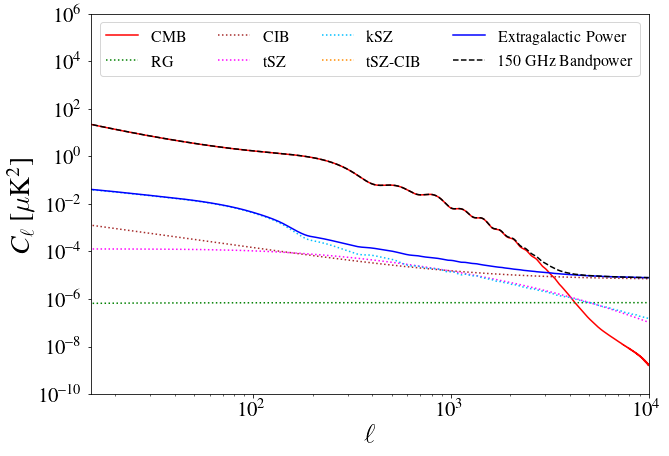

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sz = 28

ax.plot(l, cl, 'r', label = r'CMB')
ax.plot(l, cl_radio,  color = 'green', label = r'RG', ls = ':')
ax.plot(l, cl_cib, color = 'brown', label = r'CIB', ls = ':')
ax.plot(l, cl_tsz, color = 'magenta', label = r'tSZ', ls = ':')
ax.plot(l, cl_ksz, color = 'deepskyblue', label = r'kSZ', ls = ':')
ax.plot(l, cl_tsz_cib, color = 'darkorange', label = r'tSZ-CIB', ls = ':')
ax.plot(l, cl_fg_total, 'blue', label = r'Extragalactic Power')
ax.plot(l, cl_fg_total+cl, 'black', label = r'150 GHz Bandpower', ls = '--')
ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz)
ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz)
ax.tick_params(labelsize = sz-7)
ax.set_xlim(15, 10000) 
ax.set_ylim(1e-10, 1e6)
ax.set_xlabel(r'$\ell$', fontsize = sz)
ax.set_ylabel(r'$C_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol = 4, loc = 'upper center', prop={'size': sz-12}) 

fig.savefig('extragalactic_power_spectra.eps', dpi = 200.)

## Experimental Specifications

In [10]:
noiseval_white_arr = [14.6, 27.5, 104.8, 376.6]
noiseval_red_arr = [0.07, 0.19, 0.94, 2.4]


freq_arr = exp.frequencies(experiment = 'ccatp')
l, bl_dict = exp.beam_power_spectrum_dict(experiment = 'ccatp', opbeam = None)
beam_arr = []
for freq in freq_arr:
    beam_arr.append(np.sqrt(bl_dict[freq]))


noise_white_arr = []
for noiseval in noiseval_white_arr:
    l, nl = exp.white_noise_power_spectrum(noiseval)
    noise_white_arr.append(nl)    
    
noise_red_arr = []
for noiseval in noiseval_red_arr:
    l, nl = exp.red_noise_power_spectrum(noiseval, 1000, -3.5)
    noise_red_arr.append(nl)
    
l, nl_dict = exp.noise_power_spectra_dict(experiment = 'ccatp', deconvolve = False, use_cross_noise = False)
noise_arr = []
for freq in freq_arr:
    noise_arr.append(nl_dict[freq])
    

/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:103: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee
/Volumes/Extreme_SSD/codes/master_thesis/code/experiments.py:124: RuntimeWarning: divide by zero encountered in power
  nl_red = n_red*(l/elknee)**alphaknee


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


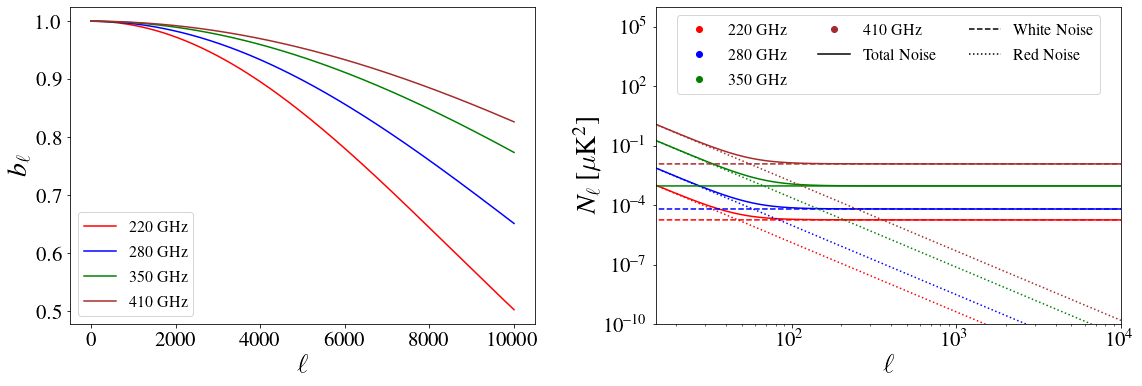

In [11]:
fig, axarr = plt.subplots(1,2, figsize=(16.5,6))
sz = 28

im0 = axarr[0].plot(l, beam_arr[0],  color = 'red', label = str(freq_arr[0])+' GHz')
im0 = axarr[0].plot(l, beam_arr[1],  color = 'blue', label = str(freq_arr[1])+' GHz')
im0 = axarr[0].plot(l, beam_arr[2],  color = 'green', label = str(freq_arr[2])+' GHz')
im0 = axarr[0].plot(l, beam_arr[3],  color = 'brown', label = str(freq_arr[3])+' GHz')
axarr[0].set_xlabel(r'$\ell$', fontsize = sz)
axarr[0].set_ylabel(r'$b_{\ell}$', fontsize = sz)
axarr[0].tick_params(labelsize = sz-7)
axarr[0].legend(ncol = 1, prop={'size': sz-12}) 


im1 = axarr[1].plot(l, noise_arr[0],  color = 'red', label = str(freq_arr[0])+' GHz')
im1 = axarr[1].plot(l, noise_white_arr[0],  color = 'red', label = str(freq_arr[0])+' GHz', ls = '--')
im1 = axarr[1].plot(l, noise_red_arr[0],  color = 'red', label = str(freq_arr[0])+' GHz', ls = ':')
im1 = axarr[1].plot(l, noise_arr[1],  color = 'blue', label = str(freq_arr[1])+' GHz')
im1 = axarr[1].plot(l, noise_white_arr[1],  color = 'blue', label = str(freq_arr[1])+' GHz', ls = '--')
im1 = axarr[1].plot(l,  noise_red_arr[1],  color = 'blue', label = str(freq_arr[1])+' GHz', ls = ':')
im1 = axarr[1].plot(l, noise_arr[2],  color = 'green', label = str(freq_arr[2])+' GHz')
im1 = axarr[1].plot(l, noise_white_arr[2],  color = 'green', label = str(freq_arr[2])+' GHz')
im1 = axarr[1].plot(l,  noise_red_arr[2],  color = 'green', label = str(freq_arr[2])+' GHz', ls = ':')
im1 = axarr[1].plot(l, noise_arr[3],  color = 'brown', label = str(freq_arr[3])+' GHz')
im1 = axarr[1].plot(l, noise_white_arr[3],  color = 'brown', label = str(freq_arr[3])+' GHz', ls = '--')
im1 = axarr[1].plot(l,  noise_red_arr[3],  color = 'brown', label = str(freq_arr[3])+' GHz', ls = ':')
axarr[1].set_ylabel(r'$N_{\ell}\ [\mu$'+'K'+r'$^2]$', fontsize = sz)
axarr[1].tick_params(labelsize = sz-7)
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlim(15, 10000) 
axarr[1].set_ylim(1e-10, 1e6)
axarr[1].set_xlabel(r'$\ell$', fontsize = sz)
colors = ['red', 'blue', 'green', 'brown']
patches = [Line2D([0], [0], color = c, marker='o', ls = '') for c in colors]
patches+= [Line2D([0], [0], color='black',linestyle='-')]
patches+= [Line2D([0], [0], color='black',linestyle='--')]
patches+= [Line2D([0], [0], color='black',linestyle=':')]
labels = [str(freq_arr[0])+' GHz', str(freq_arr[1])+' GHz', str(freq_arr[2])+' GHz', str(freq_arr[3])+' GHz', 'Total Noise', 'White Noise', 'Red Noise']
axarr[1].legend(patches, labels, loc = 'upper center', ncol = 3, prop={'size': sz-12})

fig.tight_layout(pad=3)
fig.savefig('beam_and_noise.eps', dpi = 200., bbox_inches = 'tight', pad_inches = 0.1)